# 测试图片

In [1]:
import time
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import image_utils

from args import TrainArgs
import utils
from networks import LossNetwork, StyleBankNet


os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 当前目录
#current_directory = os.path.dirname(os.path.abspath(__file__))
current_directory = os.getcwd()

default_resource_dir = os.path.join(current_directory, "..", "Images")
content_images_dir = os.path.join(default_resource_dir, 'original')
style_images_dir = os.path.join(default_resource_dir, 'style-images')
model_dir = os.path.join(current_directory, "weights")


# 这里修改训练参数
args = TrainArgs()
args.continue_training = False 
args.CONTENT_IMG_DIR = content_images_dir
args.STYLE_IMG_DIR = style_images_dir
args.SetModelWeightDir(model_dir)
args.SetNewBankWeightDir("bank_style-images")
# 默认1000
args.SetK(1)

device = args.device

d:\Program Files\Anaconda3\envs\pytorchgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device:cuda:0
device:cuda:0


In [2]:
# 找出文件数量
style_filenames = os.listdir(args.NEW_BANK_WEIGHT_DIR)
style_num = len(style_filenames)

In [3]:
"""
加载style bank net，但是不用加载loss network了
"""
# 加载model
model = StyleBankNet(style_num).to(device)
# 读取encoder权重
if os.path.exists(args.ENCODER_WEIGHT_PATH):
    model.encoder_net.load_state_dict(torch.load(args.ENCODER_WEIGHT_PATH))
else:
    raise Exception('cannot find encoder weights')

# 读取decoder权重
if os.path.exists(args.DECODER_WEIGHT_PATH):
    model.decoder_net.load_state_dict(torch.load(args.DECODER_WEIGHT_PATH))
else:
    raise Exception('cannot find encoder weights')
# 文件名从0开始
for style_id in range(style_num):
    style_pt = args.NEW_BANK_WEIGHT_PATH.format(style_id)
    model.style_bank[style_id].load_state_dict(torch.load(style_pt))

# 全部eval模式
model.encoder_net.eval()
model.decoder_net.eval()
model.style_bank.eval()


ModuleList(
  (0): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (5): ReLU(inplace=True)
  )
  (1): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (5): ReLU(inplace=True)
  )
  (2): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

下面加载图片

In [4]:
content_dataset = image_utils.ImageFolder(root_path=args.CONTENT_IMG_DIR, transform=utils.content_img_transform)
content_dataloader = torch.utils.data.DataLoader(content_dataset, batch_size=args.batch_size, shuffle=True, num_workers=4)


展示图片，第一个batch

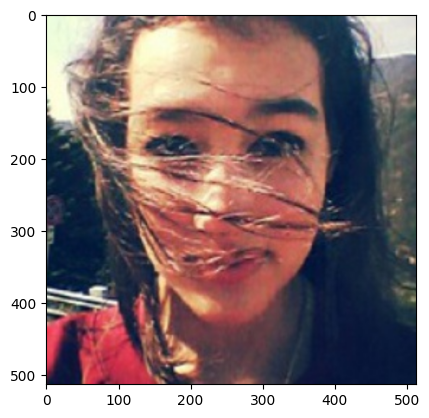

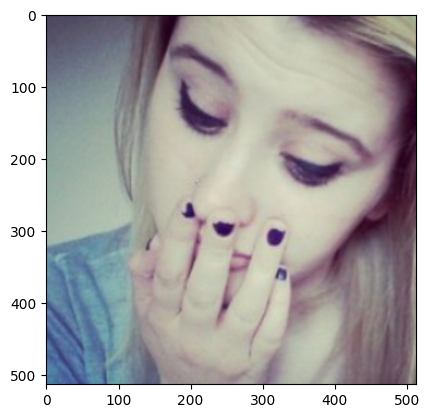

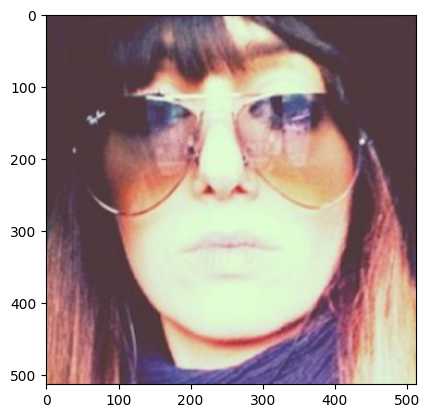

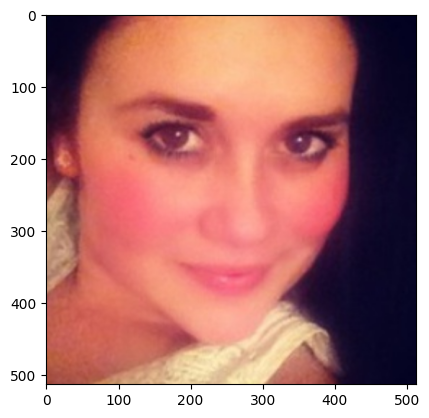

In [5]:
for imgs in content_dataloader:
    for i in range(args.batch_size):
        utils.showimg(imgs[i])
    break

进行风格化

In [8]:
styled_images = []
for imgs in content_dataloader:
    for i in range(len()):
        styled_image = model(imgs[i].to(device))
        styled_images.append(styled_image)

IndexError: index 3 is out of bounds for dimension 0 with size 3